In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
sns.set_palette("Set2")
sns.set_style("whitegrid")

In [46]:
df = pd.read_csv("results.csv")

In [47]:
# Convert string representation of dictionary to actual dictionary
df['configuration'] = df['configuration'].apply(ast.literal_eval)

# Split the 'configuration' column into multiple columns
df_split = pd.json_normalize(df['configuration'])

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, df_split], axis=1)

# Drop the original 'configuration' column
df = df.drop('configuration', axis=1)

# Display the resulting DataFrame
print(df)

     Unnamed: 0.1  Unnamed: 0  fitness_instance_1  time_instance_1  \
0               1         NaN           46.666667         0.071425   
1               5         NaN           46.000000         0.171287   
2               0        22.0           47.000000         0.101575   
3               4         NaN           50.000000         0.078543   
4               0         NaN           47.333333         0.061574   
..            ...         ...                 ...              ...   
395           232       226.0          453.000000         0.765370   
396           238       237.0          446.333333         0.779050   
397           239       239.0          434.000000         0.877045   
398           236       236.0          439.666667         0.785640   
399           237       238.0          451.666667         0.765117   

     fitness_instance_2  time_instance_2  fitness_instance_3  time_instance_3  \
0             60.000000         0.085265         2193.666667         0.587291 

In [48]:
df_split

,mutation_operator,crossover_operator,selection_method,population_replacement_strategy
0,mixed,cut_and_crossfill,uniform,lambda_mu
1,mixed,cut_and_crossfill,roulette_wheel,lambda_mu
2,swap,pmx,uniform,lambda_mu
3,mixed,cut_and_crossfill,linear_ranking,lambda_mu
4,mixed,cut_and_crossfill,exponential_ranking,lambda_mu
...,...,...,...,...
395,swap,pmx,uniform,round_robin
396,swap,cut_and_crossfill,linear_ranking,round_robin
397,swap,cut_and_crossfill,tournament,round_robin
398,swap,cut_and_crossfill,roulette_wheel,round_robin


In [49]:
df.head()

,Unnamed: 0.1,Unnamed: 0,fitness_instance_1,time_instance_1,fitness_instance_2,time_instance_2,fitness_instance_3,time_instance_3,fitness_instance_4,time_instance_4,...,rank_instance_5,rank_instance_6,rank_instance_7,rank_instance_8,average_rank,median_rank,mutation_operator,crossover_operator,selection_method,population_replacement_strategy
0,1,NaN,46.666667,0.071425,60.000000,0.085265,2193.666667,0.587291,2379.333333,0.561128,...,8,10,11,3,13.250,10.5,mixed,cut_and_crossfill,uniform,lambda_mu
1,5,NaN,46.000000,0.171287,56.333333,0.180344,2334.000000,18.952597,2345.333333,1.212451,...,11,3,6,11,14.625,9.5,mixed,cut_and_crossfill,roulette_wheel,lambda_mu
2,0,22.0,47.000000,0.101575,55.666667,0.096241,2216.333333,0.814155,2388.333333,1.084120,...,2,14,14,30,14.750,14.0,swap,pmx,uniform,lambda_mu
3,4,NaN,50.000000,0.078543,56.000000,0.094164,2313.333333,0.588371,2439.666667,0.711784,...,4,8,9,6,18.875,8.5,mixed,cut_and_crossfill,linear_ranking,lambda_mu
4,0,NaN,47.333333,0.061574,63.333333,0.087211,2275.333333,0.550383,2415.000000,0.484609,...,7,13,2,2,19.500,13.0,mixed,cut_and_crossfill,exponential_ranking,lambda_mu


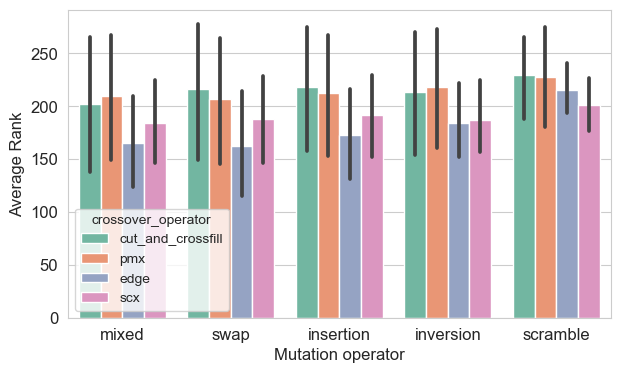

In [50]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.barplot(data=df, x="mutation_operator", y="average_rank", hue="crossover_operator")

ax.set_xlabel('Mutation operator', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)

plt.savefig("mutation_operators_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

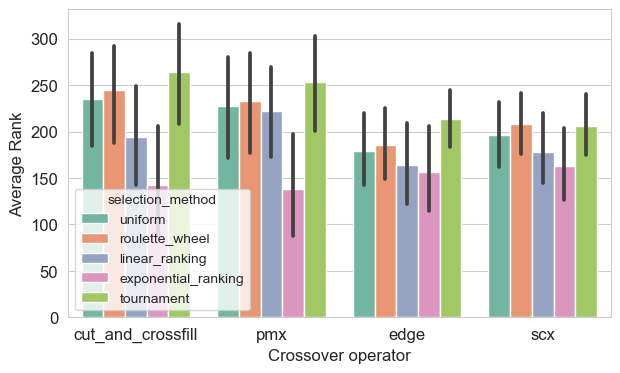

In [51]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.barplot(data=df, x="crossover_operator", y="average_rank", hue="selection_method")

ax.set_xlabel('Crossover operator', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)

plt.savefig("crossover_operators_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

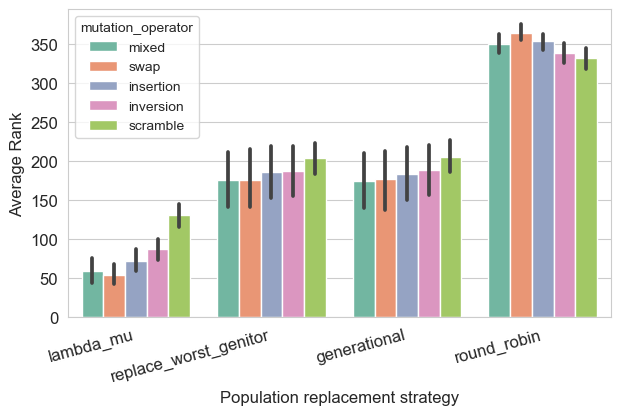

In [52]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.barplot(data=df, x="population_replacement_strategy", y="average_rank", hue="mutation_operator")

ax.set_xlabel('Population replacement strategy', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

plt.savefig("population_replacement_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

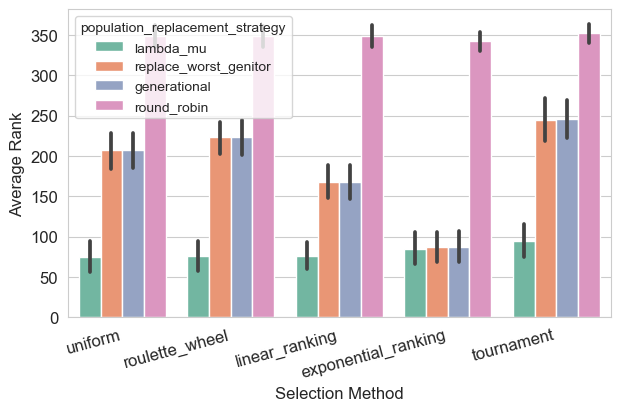

In [53]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.barplot(data=df, x="selection_method", y="average_rank", hue="population_replacement_strategy")

ax.set_xlabel('Selection Method', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

plt.savefig("selection_methods_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

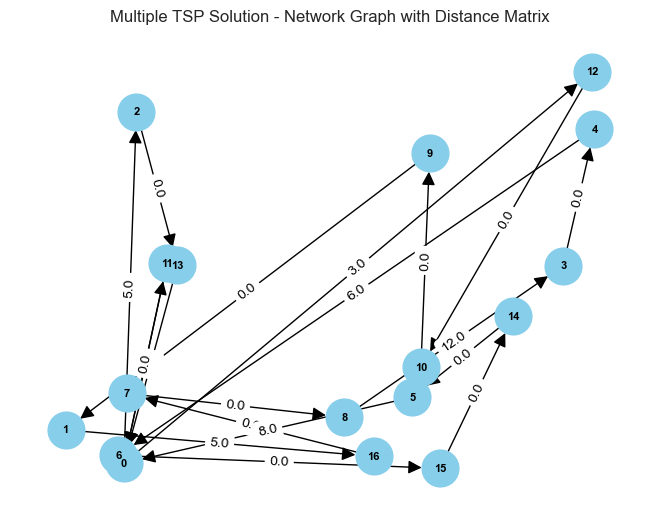

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Given solution
solution = [[0, 2, 13, 0], [0, 11, 0], [0, 12, 10, 9, 1, 16, 7, 8, 3, 4, 6, 15, 14, 5, 0]]

# Example distance matrix (replace it with your actual distance matrix)
distance_matrix = np.array([
    [0, 3.0, 5.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 3.0, 3.0, 0.0, 3.0, 5.0, 8.0, 8.0, 5.0], 
    [3.0, 0, 3.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 0.0, 0.0, 3.0, 0.0, 3.0, 8.0, 8.0, 5.0], 
    [5.0, 3.0, 0, 72.0, 72.0, 48.0, 48.0, 24.0, 24.0, 3.0, 3.0, 5.0, 3.0, 0.0, 48.0, 48.0, 24.0], 
    [48.0, 48.0, 74.0, 0, 0.0, 6.0, 6.0, 12.0, 12.0, 48.0, 48.0, 48.0, 48.0, 74.0, 6.0, 6.0, 12.0], 
    [48.0, 48.0, 74.0, 0.0, 0, 6.0, 6.0, 12.0, 12.0, 48.0, 48.0, 48.0, 48.0, 74.0, 6.0, 6.0, 12.0], 
    [8.0, 8.0, 50.0, 6.0, 6.0, 0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 50.0, 0.0, 0.0, 8.0], 
    [8.0, 8.0, 50.0, 6.0, 6.0, 0.0, 0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 50.0, 0.0, 0.0, 8.0], 
    [5.0, 5.0, 26.0, 12.0, 12.0, 8.0, 8.0, 0, 0.0, 5.0, 5.0, 5.0, 5.0, 26.0, 8.0, 8.0, 0.0], 
    [5.0, 5.0, 26.0, 12.0, 12.0, 8.0, 8.0, 0.0, 0, 5.0, 5.0, 5.0, 5.0, 26.0, 8.0, 8.0, 0.0], 
    [3.0, 0.0, 3.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 0, 0.0, 3.0, 0.0, 3.0, 8.0, 8.0, 5.0], 
    [3.0, 0.0, 3.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 0.0, 0, 3.0, 0.0, 3.0, 8.0, 8.0, 5.0], 
    [0.0, 3.0, 5.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 3.0, 3.0, 0, 3.0, 5.0, 8.0, 8.0, 5.0], 
    [3.0, 0.0, 3.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 0.0, 0.0, 3.0, 0, 3.0, 8.0, 8.0, 5.0], 
    [5.0, 3.0, 0.0, 72.0, 72.0, 48.0, 48.0, 24.0, 24.0, 3.0, 3.0, 5.0, 3.0, 0, 48.0, 48.0, 24.0], 
    [8.0, 8.0, 50.0, 6.0, 6.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 50.0, 0, 0.0, 8.0], 
    [8.0, 8.0, 50.0, 6.0, 6.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 50.0, 0.0, 0, 8.0], 
    [5.0, 5.0, 26.0, 12.0, 12.0, 8.0, 8.0, 0.0, 0.0, 5.0, 5.0, 5.0, 5.0, 26.0, 8.0, 8.0, 0]
])

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the solution and distance matrix
for route in solution:
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2])

# Positioning of nodes (optional - you can customize this)
pos = {i: (np.random.rand(), np.random.rand()) for i in range(len(distance_matrix))}

# Draw the graph with edge labels representing distances
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set title
plt.title('Multiple TSP Solution - Network Graph with Distance Matrix')

# Display the plot
plt.show()

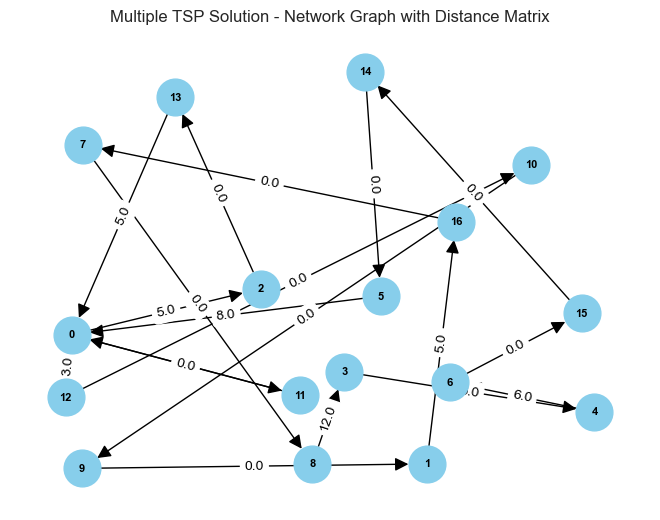

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Given solution
solution = [[0, 2, 13, 0], [0, 11, 0], [0, 12, 10, 9, 1, 16, 7, 8, 3, 4, 6, 15, 14, 5, 0]]

# Example distance matrix (replace it with your actual distance matrix)
distance_matrix = np.array([
    [0, 3.0, 5.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 3.0, 3.0, 0.0, 3.0, 5.0, 8.0, 8.0, 5.0], 
    [3.0, 0, 3.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 0.0, 0.0, 3.0, 0.0, 3.0, 8.0, 8.0, 5.0], 
    [5.0, 3.0, 0, 72.0, 72.0, 48.0, 48.0, 24.0, 24.0, 3.0, 3.0, 5.0, 3.0, 0.0, 48.0, 48.0, 24.0], 
    [48.0, 48.0, 74.0, 0, 0.0, 6.0, 6.0, 12.0, 12.0, 48.0, 48.0, 48.0, 48.0, 74.0, 6.0, 6.0, 12.0], 
    [48.0, 48.0, 74.0, 0.0, 0, 6.0, 6.0, 12.0, 12.0, 48.0, 48.0, 48.0, 48.0, 74.0, 6.0, 6.0, 12.0], 
    [8.0, 8.0, 50.0, 6.0, 6.0, 0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 50.0, 0.0, 0.0, 8.0], 
    [8.0, 8.0, 50.0, 6.0, 6.0, 0.0, 0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 50.0, 0.0, 0.0, 8.0], 
    [5.0, 5.0, 26.0, 12.0, 12.0, 8.0, 8.0, 0, 0.0, 5.0, 5.0, 5.0, 5.0, 26.0, 8.0, 8.0, 0.0], 
    [5.0, 5.0, 26.0, 12.0, 12.0, 8.0, 8.0, 0.0, 0, 5.0, 5.0, 5.0, 5.0, 26.0, 8.0, 8.0, 0.0], 
    [3.0, 0.0, 3.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 0, 0.0, 3.0, 0.0, 3.0, 8.0, 8.0, 5.0], 
    [3.0, 0.0, 3.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 0.0, 0, 3.0, 0.0, 3.0, 8.0, 8.0, 5.0], 
    [0.0, 3.0, 5.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 3.0, 3.0, 0, 3.0, 5.0, 8.0, 8.0, 5.0], 
    [3.0, 0.0, 3.0, 48.0, 48.0, 8.0, 8.0, 5.0, 5.0, 0.0, 0.0, 3.0, 0, 3.0, 8.0, 8.0, 5.0], 
    [5.0, 3.0, 0.0, 72.0, 72.0, 48.0, 48.0, 24.0, 24.0, 3.0, 3.0, 5.0, 3.0, 0, 48.0, 48.0, 24.0], 
    [8.0, 8.0, 50.0, 6.0, 6.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 50.0, 0, 0.0, 8.0], 
    [8.0, 8.0, 50.0, 6.0, 6.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 50.0, 0.0, 0, 8.0], 
    [5.0, 5.0, 26.0, 12.0, 12.0, 8.0, 8.0, 0.0, 0.0, 5.0, 5.0, 5.0, 5.0, 26.0, 8.0, 8.0, 0]
])

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the solution and distance matrix
for route in solution:
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2])

# Positioning of nodes (optional - you can customize this)
pos = {i: (np.random.rand(), np.random.rand()) for i in range(len(distance_matrix))}

# Draw the graph with edge labels representing distances
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set title
plt.title('Multiple TSP Solution - Network Graph with Distance Matrix')

# Display the plot
plt.show()

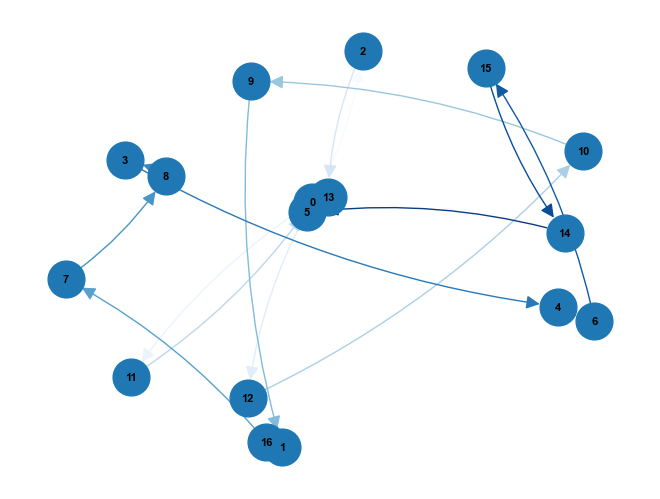

In [56]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the solution and distance matrix
for route in solution:
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2])

# Positioning of nodes using the spring layout algorithm
pos = nx.spring_layout(G)

# Draw the graph with curved edges and different colors for routes
nx.draw(G, pos, with_labels=True, node_size=700, font_size=8, font_color='black', font_weight='bold', arrowsize=20, connectionstyle='arc3,rad=0.1', edge_color=range(len(G.edges)), edge_cmap=plt.cm.Blues)

# Display the plot
plt.show()

/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/742167471.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  route_colors = plt.cm.get_cmap('tab10', len(solution))
/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/742167471.py:19: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=[route_colors(route_idx)], width=2)


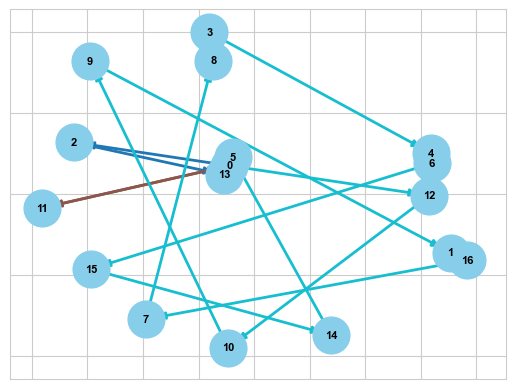

In [57]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the solution and distance matrix
for route_idx, route in enumerate(solution):
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2], route=route_idx)

# Positioning of nodes using the spring layout algorithm
pos = nx.spring_layout(G)

# Get unique colors for each route
route_colors = plt.cm.get_cmap('tab10', len(solution))

# Draw the graph with curved edges and different colors for routes
for edge in G.edges(data=True):
    route_idx = edge[2]['route']
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=[route_colors(route_idx)], width=2)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

plt.show()

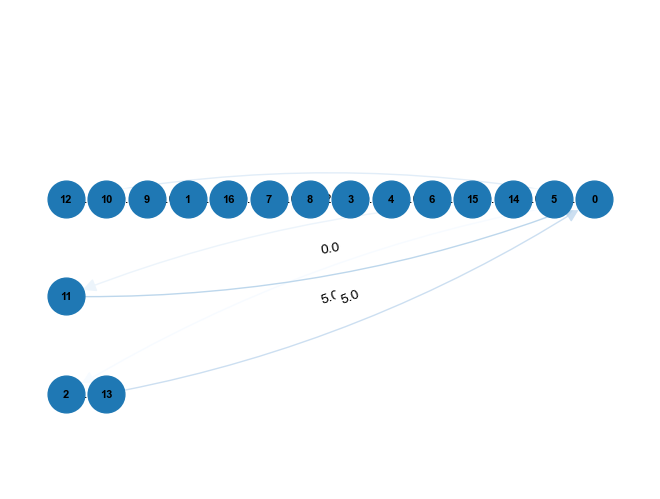

In [58]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the solution and distance matrix
for route in solution:
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2])

# Generate positions based on the order of cities in each route with increased spacing
pos = {}
spacing = 2.0  # Adjust this value to control the spacing
for route_index, route in enumerate(solution):
    for i, city in enumerate(route):
        pos[city] = (i * spacing, route_index)

# Draw the graph with curved edges, different colors for routes, and edge labels
edge_labels = {(city1, city2): distance_matrix[city1][city2] for city1, city2 in G.edges}
nx.draw(G, pos, with_labels=True, node_size=700, font_size=8, font_color='black', font_weight='bold', arrowsize=20, connectionstyle='arc3,rad=0.1', edge_color=range(len(G.edges)), edge_cmap=plt.cm.Blues)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot
plt.show()

/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/1470101283.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  route_colors = plt.cm.get_cmap('tab10', len(solution))
/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/1470101283.py:22: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=[route_colors(route_idx)], width=2)


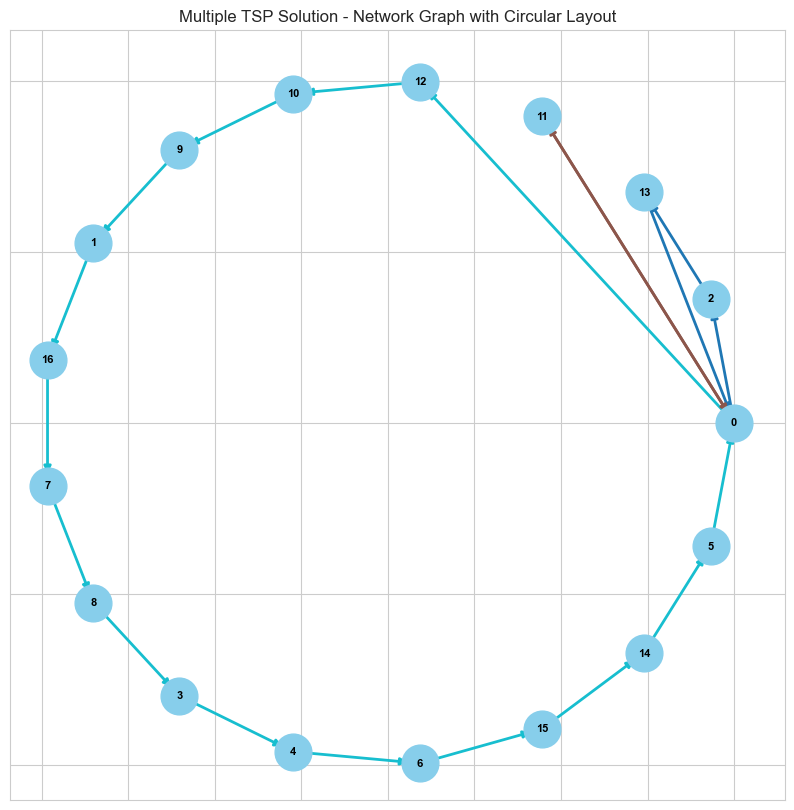

In [59]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the solution and distance matrix
for route_idx, route in enumerate(solution):
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2], route=route_idx)

# Positioning of nodes using the circular layout algorithm
pos = nx.circular_layout(G)

# Get unique colors for each route
route_colors = plt.cm.get_cmap('tab10', len(solution))

# Increase the figure size for better spacing
plt.figure(figsize=(10, 10))

# Draw the graph with curved edges and different colors for routes
for edge in G.edges(data=True):
    route_idx = edge[2]['route']
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=[route_colors(route_idx)], width=2)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

# Display the plot
plt.title('Multiple TSP Solution - Network Graph with Circular Layout')
plt.show()

/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/3448158291.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  route_colors = plt.cm.get_cmap('tab10', len(solution))
/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/3448158291.py:22: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=[route_colors(route_idx)], width=2)


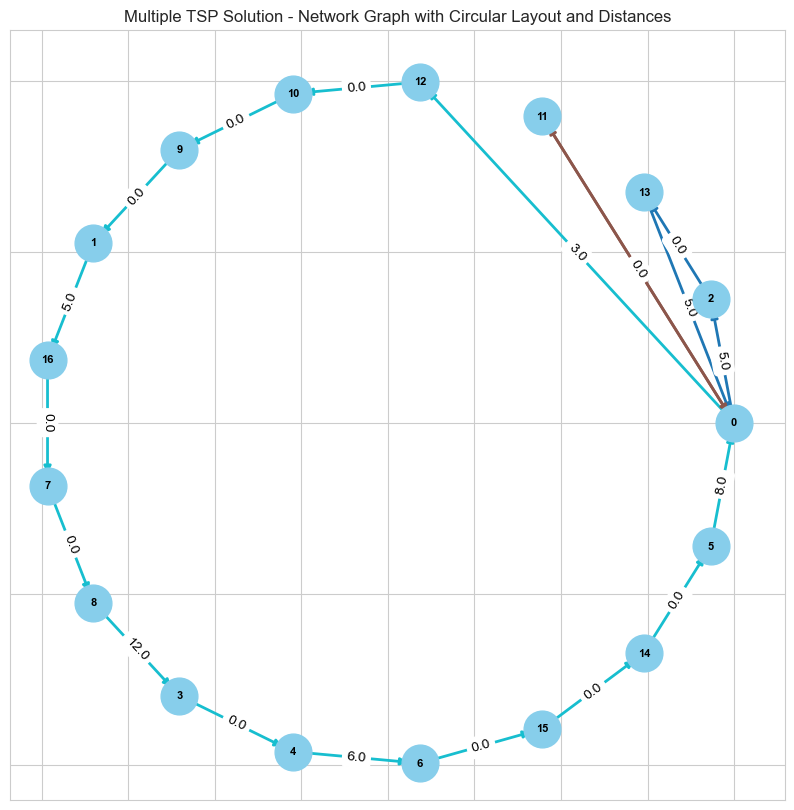

In [60]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the solution and distance matrix
for route_idx, route in enumerate(solution):
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2], route=route_idx)

# Positioning of nodes using the circular layout algorithm
pos = nx.circular_layout(G)

# Get unique colors for each route
route_colors = plt.cm.get_cmap('tab10', len(solution))

# Increase the figure size for better spacing
plt.figure(figsize=(10, 10))

# Draw the graph with curved edges and different colors for routes
for edge in G.edges(data=True):
    route_idx = edge[2]['route']
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=[route_colors(route_idx)], width=2)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

# Add edge labels with distances
edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot
plt.title('Multiple TSP Solution - Network Graph with Circular Layout and Distances')
plt.show()

/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/3410851417.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  route_colors = plt.cm.get_cmap('tab10', len(solution))
/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/3410851417.py:22: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=[route_colors(route_idx)], width=2)


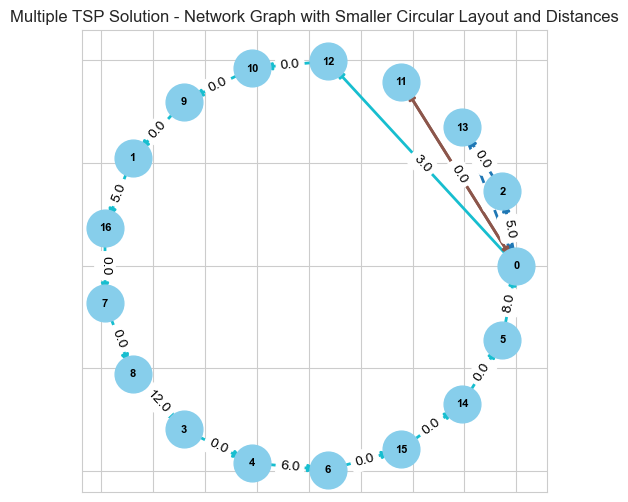

In [61]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the solution and distance matrix
for route_idx, route in enumerate(solution):
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2], route=route_idx)

# Positioning of nodes using the circular layout algorithm
pos = nx.circular_layout(G)

# Get unique colors for each route
route_colors = plt.cm.get_cmap('tab10', len(solution))

# Decrease the figure size for a smaller circle
plt.figure(figsize=(6, 6))

# Draw the graph with curved edges and different colors for routes
for edge in G.edges(data=True):
    route_idx = edge[2]['route']
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=[route_colors(route_idx)], width=2)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

# Add edge labels with distances
edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot
plt.title('Multiple TSP Solution - Network Graph with Smaller Circular Layout and Distances')
plt.show()

/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/849474151.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  route_colors = plt.cm.get_cmap('tab10', len(solution))


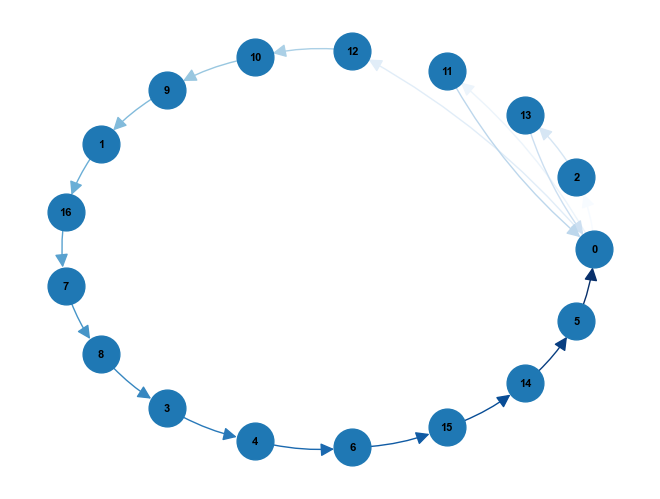

In [62]:
# Create a directed graph
G = nx.DiGraph()

# Get unique colors for each route
route_colors = plt.cm.get_cmap('tab10', len(solution))

# Add edges to the graph based on the solution and distance matrix
for route in solution:
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2])

# Positioning of nodes using the circular layout algorithm
pos = nx.circular_layout(G)

# Draw the graph with curved edges and different colors for routes
nx.draw(G, pos, with_labels=True, node_size=700, font_size=8, font_color='black', font_weight='bold', arrowsize=20, connectionstyle='arc3,rad=0.1', edge_color=range(len(G.edges)), edge_cmap=plt.cm.Blues)

# Display the plot
plt.show()

/var/folders/b1/zkx_1ry91g97d1mhb_7jh_340000gn/T/ipykernel_99206/937153647.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_cmap = plt.cm.get_cmap('viridis', len(edge_colors))


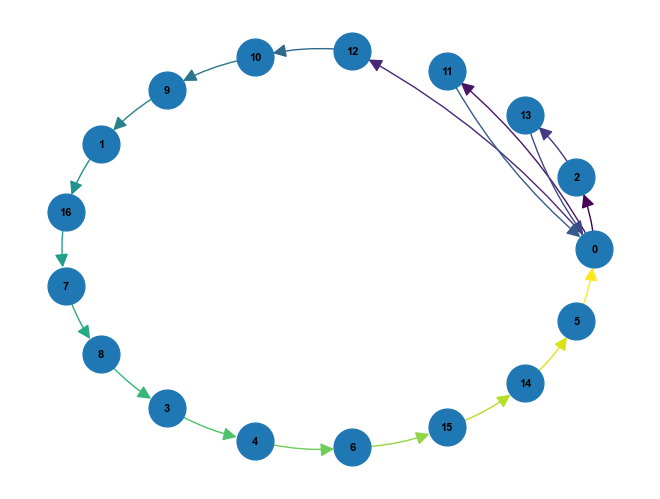

In [63]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the solution and distance matrix
for route in solution:
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        G.add_edge(city1, city2, weight=distance_matrix[city1][city2])

# Positioning of nodes using the circular layout algorithm
pos = nx.circular_layout(G)

# Draw the graph with curved edges and different colors for routes
edge_colors = range(len(G.edges))
edge_cmap = plt.cm.get_cmap('viridis', len(edge_colors))

nx.draw(G, pos, with_labels=True, node_size=700, font_size=8, font_color='black', font_weight='bold', arrowsize=20, connectionstyle='arc3,rad=0.1', edge_color=edge_colors, edge_cmap=edge_cmap, edge_vmin=min(edge_colors), edge_vmax=max(edge_colors))

# Display the plot
plt.show()